Import Modules

In [102]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")


Creating a dataset

In [103]:
dt = {"col1":[51,22,13,64,50,np.nan,17,580,19,1000],
      "col2":[np.nan,np.nan,89,np.nan,76,np.nan,53,np.nan,900,np.nan],
      "col3":['male','male','male','male','male','male','male',np.nan,'female',np.nan],
      "col4":['good','bad','good',np.nan,'good','bad','bad',np.nan,'good',np.nan]}


Loading in pandas dataframe

In [104]:
data = pd.DataFrame(dt)
data

,col1,col2,col3,col4
0,51.0,NaN,male,good
1,22.0,NaN,male,bad
2,13.0,89.0,male,good
3,64.0,NaN,male,NaN
4,50.0,76.0,male,good
5,NaN,NaN,male,bad
6,17.0,53.0,male,bad
7,580.0,NaN,NaN,NaN
8,19.0,900.0,female,good
9,1000.0,NaN,NaN,NaN


Missing value check in columns

In [105]:
data.isna().sum()

col1    1
col2    6
col3    2
col4    3
dtype: int64

dropping unnecessary columns

In [106]:
threshold = 0.5

data = data[data.columns[data.isnull().mean() < threshold]]
data

,col1,col3,col4
0,51.0,male,good
1,22.0,male,bad
2,13.0,male,good
3,64.0,male,NaN
4,50.0,male,good
5,NaN,male,bad
6,17.0,male,bad
7,580.0,NaN,NaN
8,19.0,female,good
9,1000.0,NaN,NaN


In [107]:
data = data.loc[data.isnull().mean(axis = 1) < threshold]
data

,col1,col3,col4
0,51.0,male,good
1,22.0,male,bad
2,13.0,male,good
3,64.0,male,NaN
4,50.0,male,good
5,NaN,male,bad
6,17.0,male,bad
8,19.0,female,good


In [108]:
columns = ['col1']


In [109]:
data[columns].fillna(data['col1'].mean())

,col1
0,51.000000
1,22.000000
2,13.000000
3,64.000000
4,50.000000
5,33.714286
6,17.000000
8,19.000000


In [110]:
for col in columns:
    data[col] = data[col].fillna(data[col].median())
    
data

,col1,col3,col4
0,51.0,male,good
1,22.0,male,bad
2,13.0,male,good
3,64.0,male,NaN
4,50.0,male,good
5,22.0,male,bad
6,17.0,male,bad
8,19.0,female,good


In [111]:
cat_columns = ['col3', 'col4']

In [113]:
# working with irish dataset:

from imblearn.datasets import make_imbalance
from sklearn.datasets import load_iris

data = load_iris()
data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [114]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Datashape: (60,)


<Axes: >

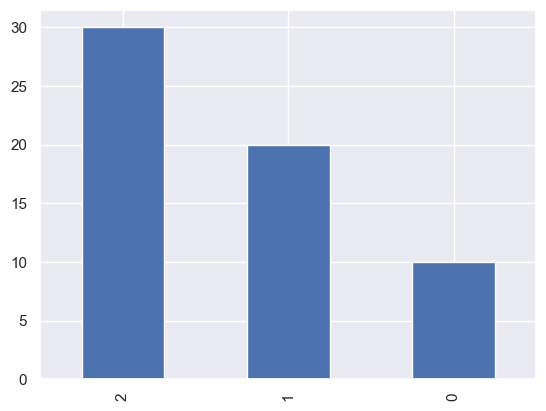

In [123]:
from imblearn.datasets import make_imbalance
from sklearn.datasets import load_iris

data = load_iris()

X, y = data.data, data.target
X,y = make_imbalance(X, y, sampling_strategy= {0: 10, 1: 20, 2: 30}, random_state = 42)
print('Datashape:', y.shape)
pd.Series(y).value_counts().plot.bar()
